Import libraries

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from string import digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from math import sqrt

sns.set_palette("Set2")
sns.set_style("ticks")

Import data

In [0]:
with open ("/content/filename.txt", "r", encoding="utf8", errors='ignore') as filenames:
  cars = filenames.readlines()

In [0]:
cars[0]

'\n'

In [0]:
info = []
for car in cars:
  if ".jpg" in car:
    info.append(car)

In [0]:
clean = []
for car in info:
  clean.append(car.split("          ")[1])

In [0]:
clean_2 = []
for car in clean:
  clean_2.append(car.replace("        \n","").strip().lstrip(digits).strip())

Create dataframe from filenames

In [0]:
make = []
model = []
year = []
MSRP = []
front_wheel_size = []
horse_power = []
displacement = []
engine = []
width = []
height = []
length = []
mileage = []
drivetrain = []
capacity = []
passenger_doors = []
body_style = []

In [0]:
for car in clean_2:
  if ".jpg" in car:
    #print(clean_2.index(car))
    make.append(car.split("_")[0])
    model.append(car.split("_")[1])
    year.append(car.split("_")[2])
    MSRP.append(car.split("_")[3])
    front_wheel_size.append(car.split("_")[4])
    horse_power.append(car.split("_")[5])
    displacement.append(car.split("_")[6])
    engine.append(car.split("_")[7])
    width.append(car.split("_")[8])
    height.append(car.split("_")[9])
    length.append(car.split("_")[10])
    mileage.append(car.split("_")[11])
    drivetrain.append(car.split("_")[12])
    capacity.append(car.split("_")[13])
    passenger_doors.append(car.split("_")[14])
    body_style.append(car.split("_")[15])

In [0]:
data = {
    "Make":make,
    "Model":model,
    "Year":year,
    "MSRP":MSRP,
    "Front Wheel Size (in)":front_wheel_size,
    "SAE Net Horsepower @ RPM":horse_power,
    "Displacement":displacement,
    "Engine Type":engine,
    "Width, Max w/o mirrors (in)":width,
    "Height, Overall (in)":height,
    "Length, Overall (in)":length,
    "Gas Mileage":mileage,
    "Drivetrain":drivetrain,
    "Passenger Capacity":capacity,
    "Passenger Doors":passenger_doors,
    "Body Style":body_style
    }
cars_info = pd.DataFrame(data)

Remove Duplicates

In [0]:
cars_info.drop_duplicates(inplace=True)

Summary of Dataset

In [0]:
cars_info.head()

,Make,Model,Year,MSRP,Front Wheel Size (in),SAE Net Horsepower @ RPM,Displacement,Engine Type,"Width, Max w/o mirrors (in)","Height, Overall (in)","Length, Overall (in)",Gas Mileage,Drivetrain,Passenger Capacity,Passenger Doors,Body Style
0,Acura,ILX,2013,28,16,110,15,4,70,55,179,39,FWD,5,4,4dr
20,Acura,ILX,2014,28,16,110,15,4,70,55,179,39,FWD,5,4,4dr
40,Acura,ILX,2015,27,17,150,20,4,70,55,179,24,FWD,5,4,4dr
50,Acura,ILX,2016,27,17,200,24,4,70,55,181,25,FWD,5,4,4dr
88,Acura,ILX,2017,27,17,200,24,4,70,55,181,25,FWD,5,4,4dr


In [0]:
cars_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 46609
Data columns (total 16 columns):
Make                           1496 non-null object
Model                          1496 non-null object
Year                           1496 non-null object
MSRP                           1496 non-null object
Front Wheel Size (in)          1496 non-null object
SAE Net Horsepower @ RPM       1496 non-null object
Displacement                   1496 non-null object
Engine Type                    1496 non-null object
Width, Max w/o mirrors (in)    1496 non-null object
Height, Overall (in)           1496 non-null object
Length, Overall (in)           1496 non-null object
Gas Mileage                    1496 non-null object
Drivetrain                     1496 non-null object
Passenger Capacity             1496 non-null object
Passenger Doors                1496 non-null object
Body Style                     1496 non-null object
dtypes: object(16)
memory usage: 198.7+ KB


Missing data

In [0]:
pd.DataFrame(cars_info.isnull().mean()*100, columns=["Missing Values %"])

,Missing Values %
Make,0.0
Model,0.0
Year,0.0
MSRP,0.0
Front Wheel Size (in),0.0
SAE Net Horsepower @ RPM,0.0
Displacement,0.0
Engine Type,0.0
"Width, Max w/o mirrors (in)",0.0
"Height, Overall (in)",0.0


In [0]:
cars_info.iloc[:, 0].unique() 

array(['Acura', 'Alfa Romeo', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'INFINITI', 'Jaguar',
       'Jeep', 'Kia', 'Lamborghini', 'Lexus', 'Lincoln', 'Maserati',
       'Mazda', 'McLaren', 'MINI', 'Mitsubishi', 'Nissan', 'Porsche',
       'Ram', 'smart', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)

In [0]:
cars_info.iloc[:, 1].unique() 

array(['ILX', 'MDX', 'NSX', 'RDX', 'RLX', 'TLX', '4C', 'Giulia', 'A3',
       'A4', 'A5', 'A6', 'A7', 'A8', 'e-tron', 'Q3', 'Q5', 'Q7', 'Q8',
       'R8', 'TT', 'Mulsanne', '2-Series', '3-Series', '5-Series',
       '6-Series', '7-Series', 'i3', 'i8', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'Z4', 'Enclave', 'Encore', 'Envision', 'Lacrosse',
       'Regal', 'ATS', 'CT4', 'CT5', 'CT6', 'CTS', 'Escalade', 'XT4',
       'XT5', 'XT6', 'XTS', 'Blazer', 'Cruze', 'Equinox', 'Impala',
       'Malibu', 'Sonic', 'Spark', 'Tahoe', 'Trax', 'Volt', '300',
       'Pacifica', 'Challenger', 'Charger', 'Durango', 'Journey',
       '488 GTB', '500e', '500L', '500X', '500', 'Ecosport', 'Edge',
       'Escape', 'Expedition', 'Explorer', 'F-150', 'Fiesta', 'Flex',
       'Fusion', 'Mustang', 'Ranger', 'Taurus', 'G70', 'G80', 'G90',
       'Acadia', 'Canyon', 'Terrain', 'Yukon', 'Accord', 'Civic',
       'Clarity', 'CR-V', 'Fit', 'HR-V', 'Insight', 'Odyssey', 'Passport',
       'Pilot', 'Accent', 'E

In [0]:
cars_info.iloc[:, 2].unique() 

array(['2013', '2014', '2015', '2016', '2017', '2019', '2020', '2011',
       '2012', '2001', '2002', '2003', '2004', '2005', '2010', '2009',
       '1998', '1999', '2000', '2008', '2006', '2007', '1997'],
      dtype=object)

In [0]:
cars_info.iloc[:, 3].unique()

array(['28', '27', '25', '42', '43', '44', '56', '84', '89', '156', '157',
       '34', '35', '36', '37', '39', '48', '60', '65', '61', '31', '32',
       '33', '55', '41', '38', '47', '51', '53', '46', '54', '59', '64',
       '68', '76', '69', '78', '72', '75', '86', '85', '82', '83', 'nan',
       '74', '40', '50', '52', '49', '67', '123', '136', '173', '175',
       '189', '195', '45', '285', '290', '303', '81', '77', '91', '135',
       '140', '147', '57', '58', '62', '63', '73', '99', '30', '26', '29',
       '21', '18', '22', '23', '24', '19', '20', '13', '15', '16', '17',
       '245', '262', '14', '70', '71', '66', '80', '12', '200', '92',
       '79', '88', '96', '201', '184', '188', '192', '299', '11', '95',
       '106', '109', '111', '174', '210', '90', '103', '94', '97'],
      dtype=object)

In [0]:
cars_info.iloc[:, 4].unique()

array(['16', '17', '18', '20', '19', '21', '22', '15', '14', '13'],
      dtype=object)

In [0]:
cars_info.iloc[:, 5].unique()

array(['110', '150', '200', '300', '290', '250', '570', '240', '270',
       '310', '370', '230', '280', '170', '180', '210', '220', '330',
       '340', '430', '400', '420', '520', '610', '500', '320', '350',
       '360', '380', '260', '440', '130', '190', '160', '120', '840',
       '980', '- 0', '140', '470', '480', '660', '100', '390', '650',
       '640', '410', '450', '560', '710', '920', '740', '780', '530',
       '540', '600', '890', 'nan', '510', '730', '990'], dtype=object)

In [0]:
cars_info.iloc[:, 6].unique()

array(['15', '20', '24', '37', '35', '30', '23', '17', '18', '42', '40',
       'nan', '52', '67', '68', '44', '36', '14', '25', '62', '43', '16',
       '12', '53', '57', '64', '39', '13', '54', '50', '38', '33', '29',
       '10', '32', '56', '46', '27'], dtype=object)

In [0]:
cars_info.iloc[:, 7].unique()

array(['4', '6', '8', 'nan', '10', '3', '5'], dtype=object)

In [0]:
cars_info.iloc[:, 8].unique()

array(['70', '78', '77', '71', '87', '76', '73', '74', 'nan', '72', '75',
       '69', '79', '80', '- ', '67', '68', '62', '64', '85', '66', '83',
       '82', '65'], dtype=object)

In [0]:
cars_info.iloc[:, 9].unique()

array(['55', '68', '67', '46', '47', '65', '66', '57', '56', '54', '58',
       '62', '64', '49', '48', '53', '59', '50', '60', '63', '69', '71',
       '51', '72', '70', '75', '74', 'nan', '- ', '61', '76', '77', '73',
       '78', '52'], dtype=object)

In [0]:
cars_info.iloc[:, 10].unique()

array(['179', '181', '182', '191', '193', '196', '174', '176', '180',
       '183', '184', '186', '198', '190', '157', '169', '168', '175',
       '185', '194', '195', '202', '207', '208', '172', '200', '199',
       '164', '165', '219', '192', '197', '205', '206', '158', '187',
       '203', '166', '167', '170', '201', '204', '188', 'nan', '189',
       '- T', '173', '144', '143', '177', '142', '139', '161', '178',
       '210', '213', '209', '231', '159', '162', '160', '155', '218',
       '152', '163', '171', '148', '149', '244', '224', '242', '228',
       '229', '232', '237', '238', '106', '212', '150', '153'],
      dtype=object)

In [0]:
cars_info.iloc[:, 11].unique()

array(['39', '24', '25', '16', 'nan', '20', '19', '17', '21', '29', '28',
       '23', '26', '27', '22', '18', '13', '14', '11', '15', '30', '47',
       '49', '35', '43', '31', '41', '48', '32', '57', '40', '55', '33',
       '51', '12', '42', '37', '36', '53', '54', '58'], dtype=object)

In [0]:
cars_info.iloc[:, 12].unique()

array(['FWD', 'AWD', 'RWD', '4WD'], dtype=object)

In [0]:
cars_info.iloc[:, 13].unique()

array(['5', '7', '6', '2', '4', '9', '8', '3'], dtype=object)

In [0]:
cars_info.iloc[:, 14].unique()

array(['4', '2', '3'], dtype=object)

In [0]:
cars_info.iloc[:, 15].unique()

array(['4dr', 'SUV', '2dr', 'Convertible', 'Station Wagon', 'Pickup',
       'Van', '3dr'], dtype=object)

In [0]:
cars_info.replace({"nan":np.nan, "- ":np.nan, "- T":np.nan, "- 0":np.nan}, inplace=True)

In [0]:
pd.DataFrame(cars_info.isnull().mean()*100, columns=["Missing Values %"])

,Missing Values %
Make,0.000000
Model,0.000000
Year,0.000000
MSRP,0.133690
Front Wheel Size (in),0.000000
SAE Net Horsepower @ RPM,0.467914
Displacement,3.074866
Engine Type,3.409091
"Width, Max w/o mirrors (in)",0.334225
"Height, Overall (in)",0.467914


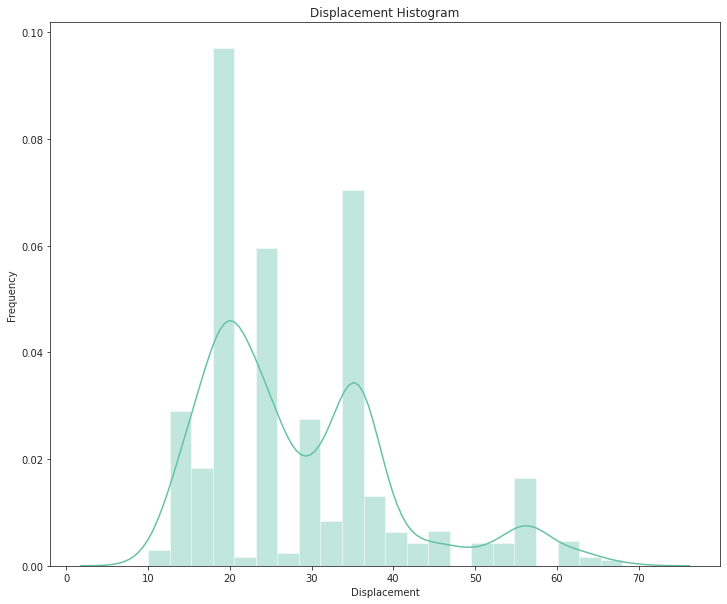

In [0]:
plt.figure(figsize=(12,10))
sns.distplot(cars_info["Displacement"])
plt.title("Displacement Histogram")
plt.ylabel("Frequency")
plt.show()

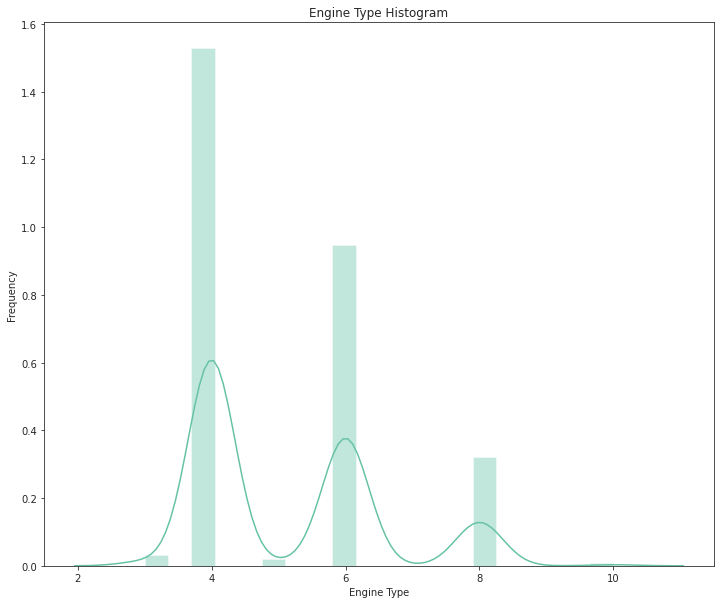

In [0]:
plt.figure(figsize=(12,10))
sns.distplot(cars_info["Engine Type"])
plt.title("Engine Type Histogram")
plt.ylabel("Frequency")
plt.show()

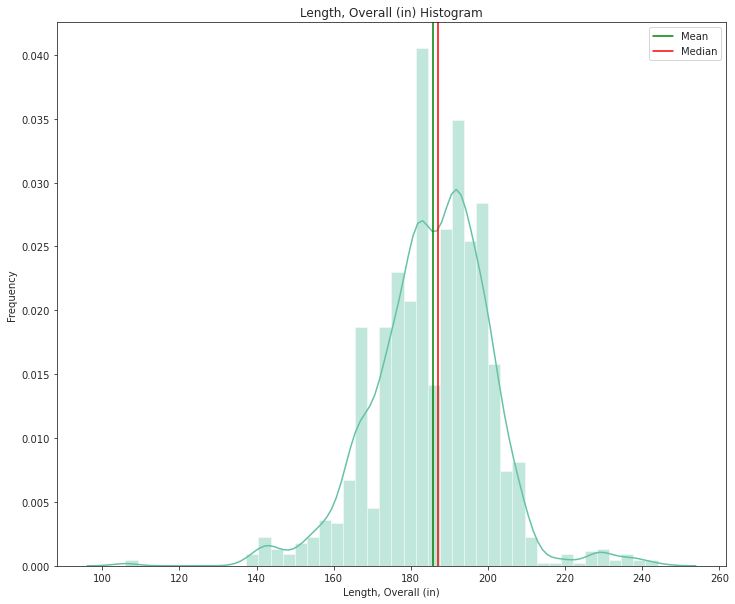

In [0]:
plt.figure(figsize=(12,10))
sns.distplot(cars_info["Length, Overall (in)"])
plt.axvline(x=cars_info["Length, Overall (in)"].astype("float").mean(), color="green")
plt.axvline(x=cars_info["Length, Overall (in)"].astype("float").median(), color="red")
plt.legend(["Mean", "Median"])
plt.title("Length, Overall (in) Histogram")
plt.ylabel("Frequency")
plt.show()

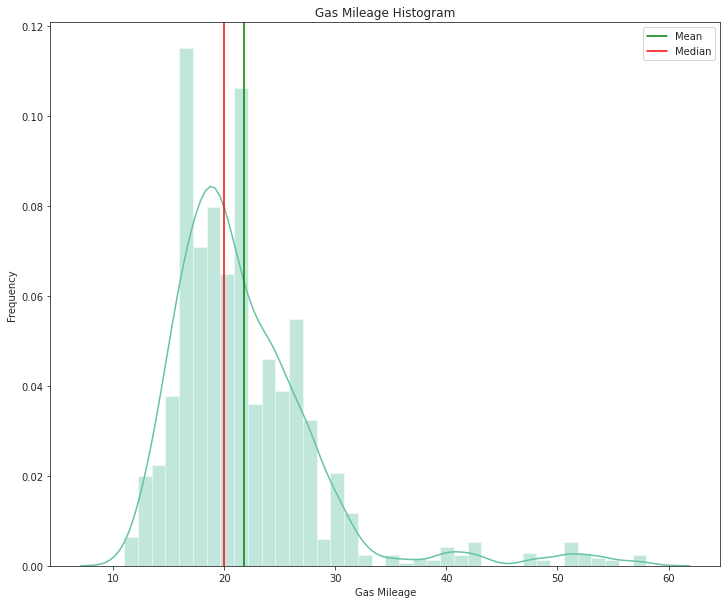

In [0]:
plt.figure(figsize=(12,10))
sns.distplot(cars_info["Gas Mileage"])
plt.axvline(x=cars_info["Gas Mileage"].astype("float").mean(), color="green")
plt.axvline(x=cars_info["Gas Mileage"].astype("float").median(), color="red")
plt.legend(["Mean", "Median"])
plt.title("Gas Mileage Histogram")
plt.ylabel("Frequency")
plt.show()

Based on the previous histograms, I have determined to impute missing values according to the following criteria:



*   Displacement: Mode
*   Engine Type: Mode
*   Length, Overall (in): Median
*   Gas Mileage: Median




In [0]:
cars_info["Displacement"] = cars_info["Displacement"].fillna(cars_info["Displacement"].mode().mean())
cars_info["Engine Type"] = cars_info["Engine Type"].fillna(cars_info["Engine Type"].mode().mean())

cars_info["Length, Overall (in)"] = cars_info["Length, Overall (in)"].fillna(cars_info["Length, Overall (in)"].astype("float").mean())
cars_info["Gas Mileage"] = cars_info["Gas Mileage"].fillna(cars_info["Gas Mileage"].astype("float").mean())

Now we drop the remaining missing values

In [0]:
cars_info.dropna(inplace=True)

In [0]:
pd.DataFrame(cars_info.isnull().mean()*100, columns=["Missing Values %"])

,Missing Values %
Make,0.0
Model,0.0
Year,0.0
MSRP,0.0
Front Wheel Size (in),0.0
SAE Net Horsepower @ RPM,0.0
Displacement,0.0
Engine Type,0.0
"Width, Max w/o mirrors (in)",0.0
"Height, Overall (in)",0.0


Many numeric values have been encoded as strings, it would be useful if we turn them back into numeric values.

In [0]:
for column in cars_info.columns:
  try:
    cars_info[column] = cars_info[column].astype("float")
  except:
    pass

In [0]:
cars_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1478 entries, 0 to 46609
Data columns (total 16 columns):
Make                           1478 non-null object
Model                          1478 non-null object
Year                           1478 non-null float64
MSRP                           1478 non-null float64
Front Wheel Size (in)          1478 non-null float64
SAE Net Horsepower @ RPM       1478 non-null float64
Displacement                   1478 non-null float64
Engine Type                    1478 non-null float64
Width, Max w/o mirrors (in)    1478 non-null float64
Height, Overall (in)           1478 non-null float64
Length, Overall (in)           1478 non-null float64
Gas Mileage                    1478 non-null float64
Drivetrain                     1478 non-null object
Passenger Capacity             1478 non-null float64
Passenger Doors                1478 non-null float64
Body Style                     1478 non-null object
dtypes: float64(12), object(4)
memory usage: 196

Convert MSRP in thousands of dollars to dollars

In [0]:
cars_info["MSRP"] = cars_info["MSRP"] * 1000

Exploratory Data Analysis

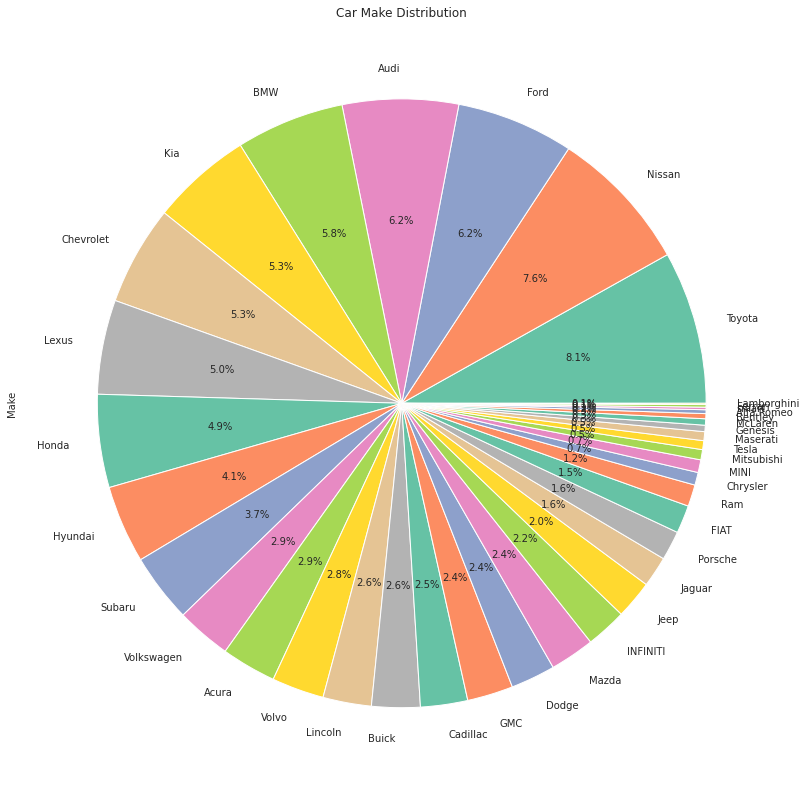

In [0]:
plt.figure(figsize=(14,14))
plt.title("Car Make Distribution")
cars_info["Make"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

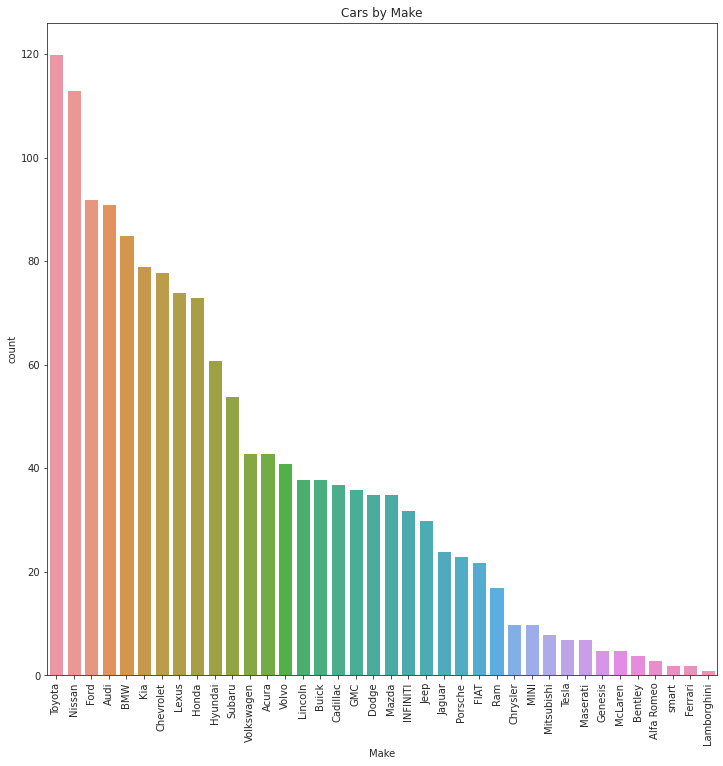

In [0]:
plt.figure(figsize=(12, 12))
sns.countplot("Make", data=cars_info, order=cars_info["Make"].value_counts().index)
plt.title("Cars by Make")
plt.xticks(rotation=90)
plt.show()

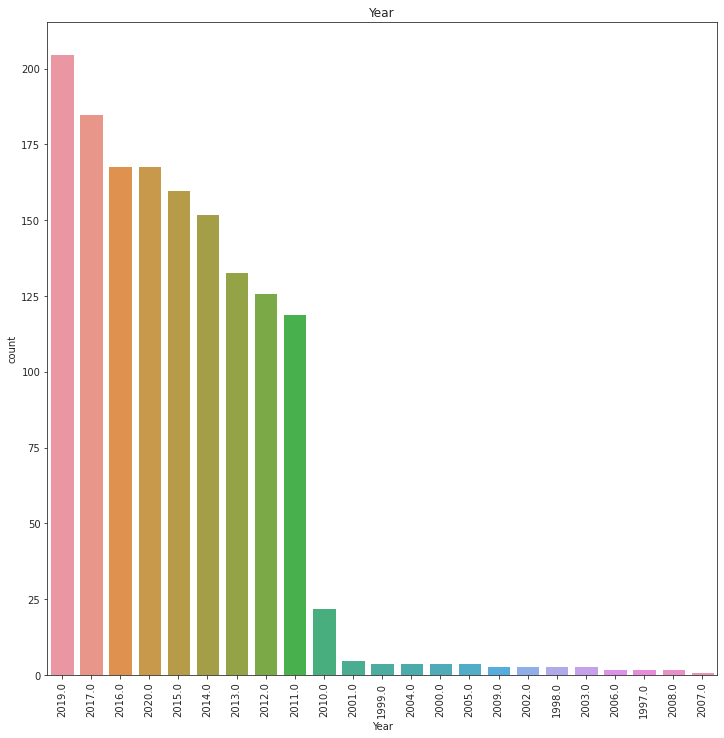

In [0]:
plt.figure(figsize=(12, 12))
sns.countplot("Year", data=cars_info, order=cars_info["Year"].value_counts().index)
plt.title("Year")
plt.xticks(rotation=90)
plt.show()

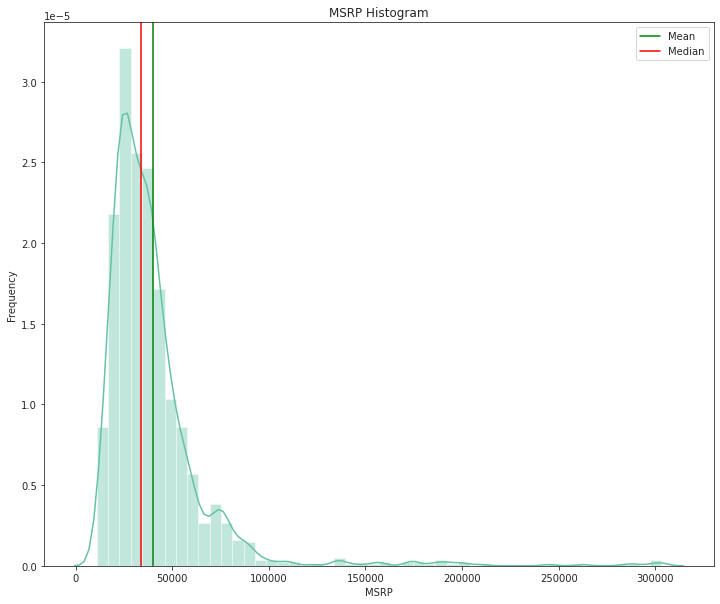

In [0]:
plt.figure(figsize=(12,10))
sns.distplot(cars_info["MSRP"])
plt.axvline(x=cars_info["MSRP"].astype("float").mean(), color="green")
plt.axvline(x=cars_info["MSRP"].astype("float").median(), color="red")
plt.legend(["Mean", "Median"])
plt.title("MSRP Histogram")
plt.ylabel("Frequency")
plt.show()

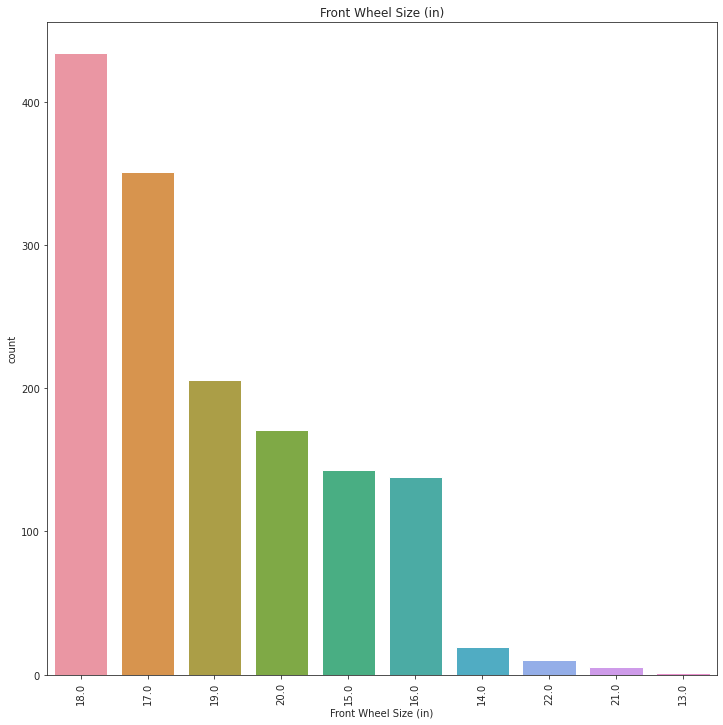

In [0]:
column = "Front Wheel Size (in)"
plt.figure(figsize=(12, 12))
sns.countplot(column, data=cars_info, order=cars_info[column].value_counts().index)
plt.title(column)
plt.xticks(rotation=90)
plt.show()

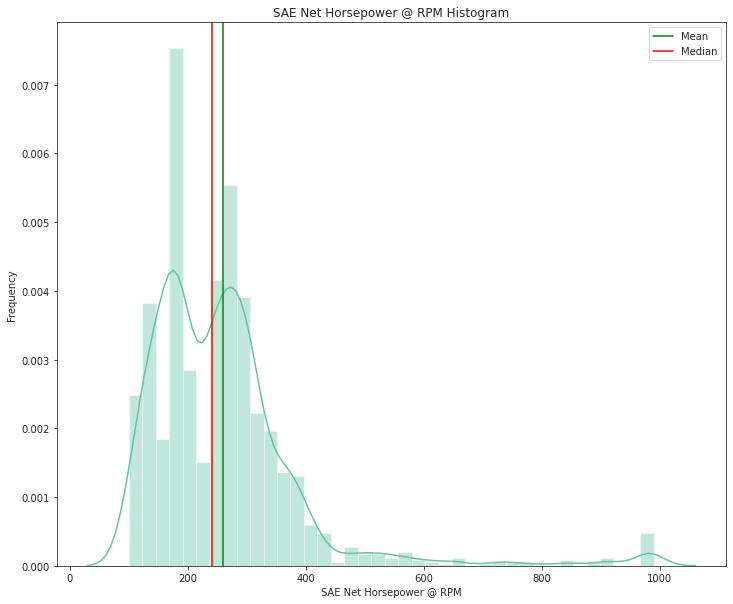

In [0]:
column = "SAE Net Horsepower @ RPM"
plt.figure(figsize=(12,10))
sns.distplot(cars_info[column])
plt.axvline(x=cars_info[column].astype("float").mean(), color="green")
plt.axvline(x=cars_info[column].astype("float").median(), color="red")
plt.legend(["Mean", "Median"])
plt.title(column + " Histogram")
plt.ylabel("Frequency")
plt.show()

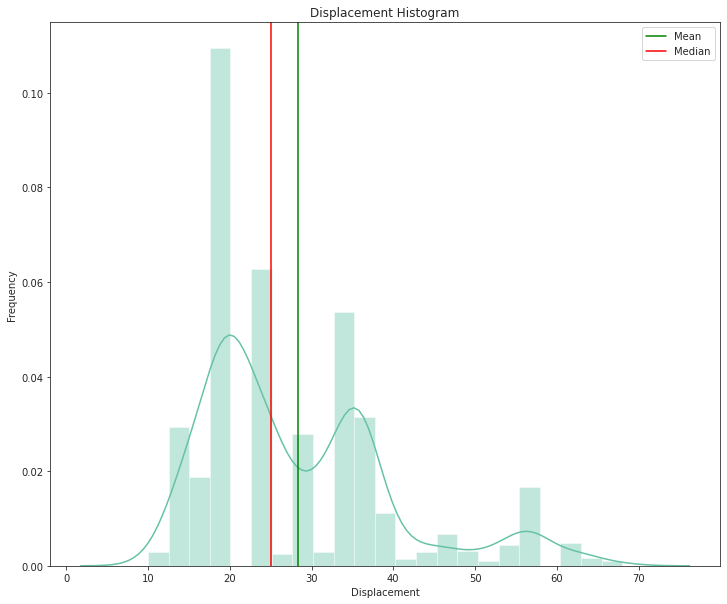

In [0]:
column = "Displacement"
plt.figure(figsize=(12,10))
sns.distplot(cars_info[column])
plt.axvline(x=cars_info[column].astype("float").mean(), color="green")
plt.axvline(x=cars_info[column].astype("float").median(), color="red")
plt.legend(["Mean", "Median"])
plt.title(column + " Histogram")
plt.ylabel("Frequency")
plt.show()

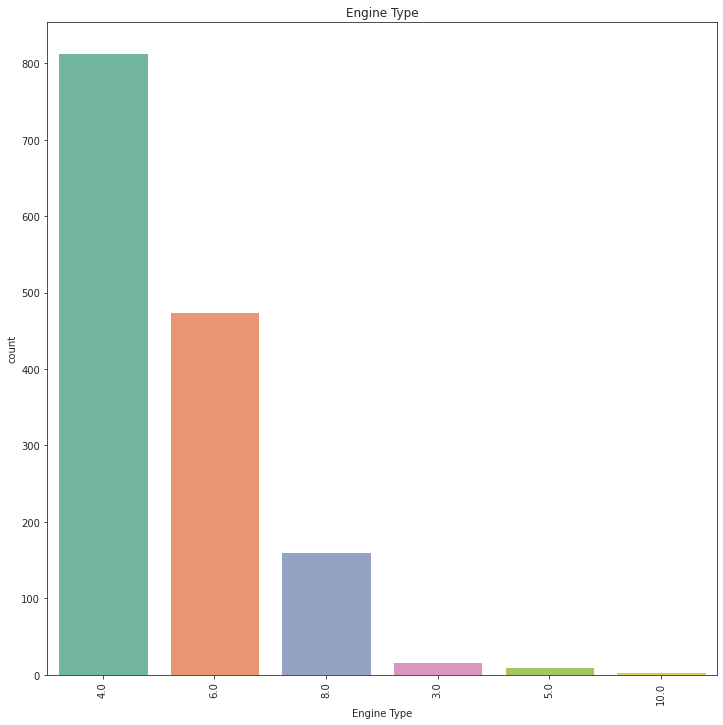

In [0]:
column = "Engine Type"
plt.figure(figsize=(12, 12))
sns.countplot(column, data=cars_info, order=cars_info[column].value_counts().index)
plt.title(column)
plt.xticks(rotation=90)
plt.show()

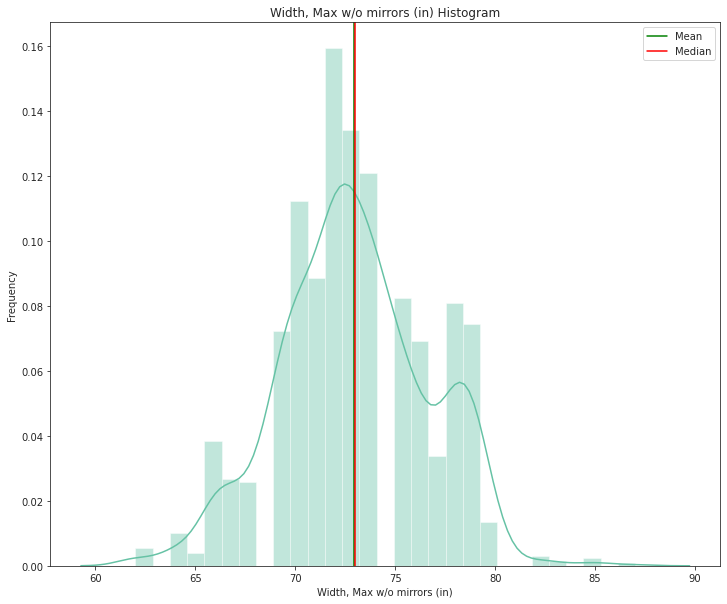

In [0]:
column = "Width, Max w/o mirrors (in)"
plt.figure(figsize=(12,10))
sns.distplot(cars_info[column])
plt.axvline(x=cars_info[column].astype("float").mean(), color="green")
plt.axvline(x=cars_info[column].astype("float").median(), color="red")
plt.legend(["Mean", "Median"])
plt.title(column + " Histogram")
plt.ylabel("Frequency")
plt.show()

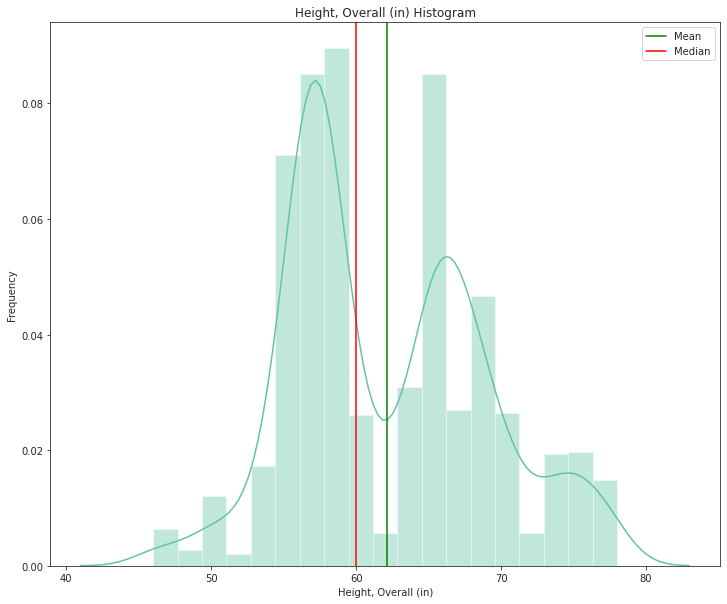

In [0]:
column = "Height, Overall (in)"
plt.figure(figsize=(12,10))
sns.distplot(cars_info[column])
plt.axvline(x=cars_info[column].astype("float").mean(), color="green")
plt.axvline(x=cars_info[column].astype("float").median(), color="red")
plt.legend(["Mean", "Median"])
plt.title(column + " Histogram")
plt.ylabel("Frequency")
plt.show()

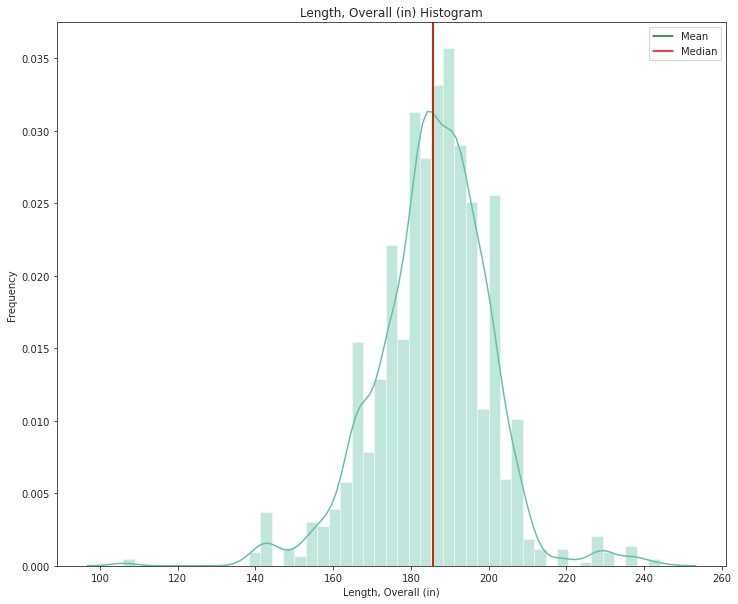

In [0]:
column = "Length, Overall (in)"
plt.figure(figsize=(12,10))
sns.distplot(cars_info[column])
plt.axvline(x=cars_info[column].astype("float").mean(), color="green")
plt.axvline(x=cars_info[column].astype("float").median(), color="red")
plt.legend(["Mean", "Median"])
plt.title(column + " Histogram")
plt.ylabel("Frequency")
plt.show()

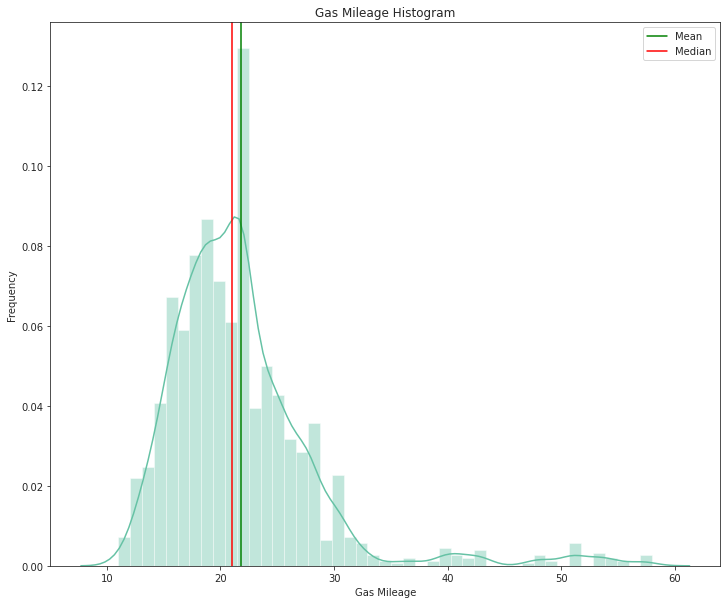

In [0]:
plt.figure(figsize=(12,10))
sns.distplot(cars_info["Gas Mileage"])
plt.axvline(x=cars_info["Gas Mileage"].astype("float").mean(), color="green")
plt.axvline(x=cars_info["Gas Mileage"].astype("float").median(), color="red")
plt.legend(["Mean", "Median"])
plt.title("Gas Mileage Histogram")
plt.ylabel("Frequency")
plt.show()

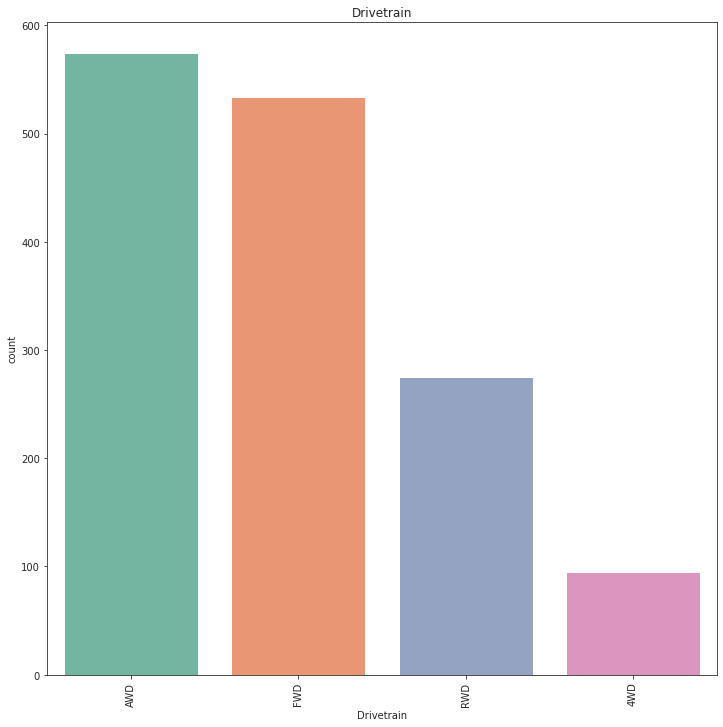

In [0]:
column = "Drivetrain"
plt.figure(figsize=(12, 12))
sns.countplot(column, data=cars_info, order=cars_info[column].value_counts().index)
plt.title(column)
plt.xticks(rotation=90)
plt.show()

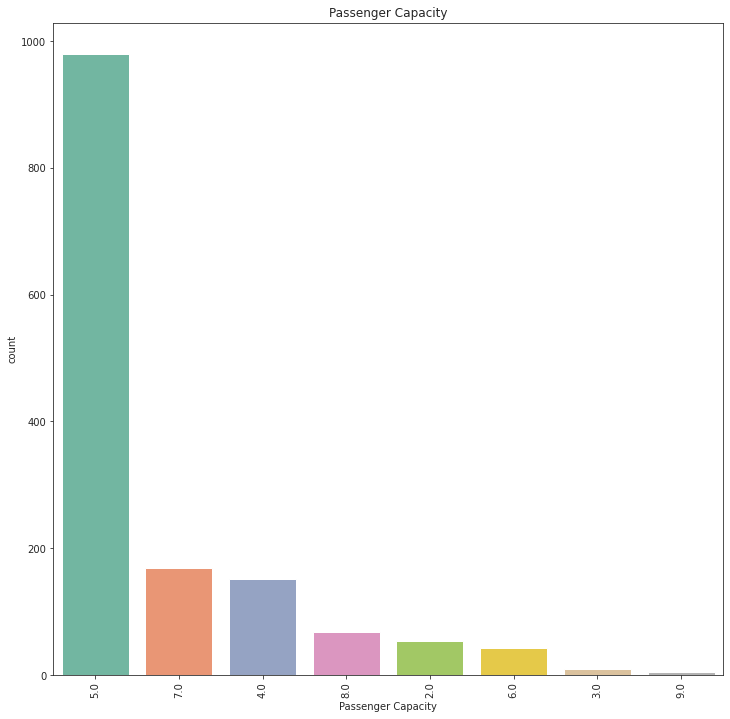

In [0]:
column = "Passenger Capacity"
plt.figure(figsize=(12, 12))
sns.countplot(column, data=cars_info, order=cars_info[column].value_counts().index)
plt.title(column)
plt.xticks(rotation=90)
plt.show()

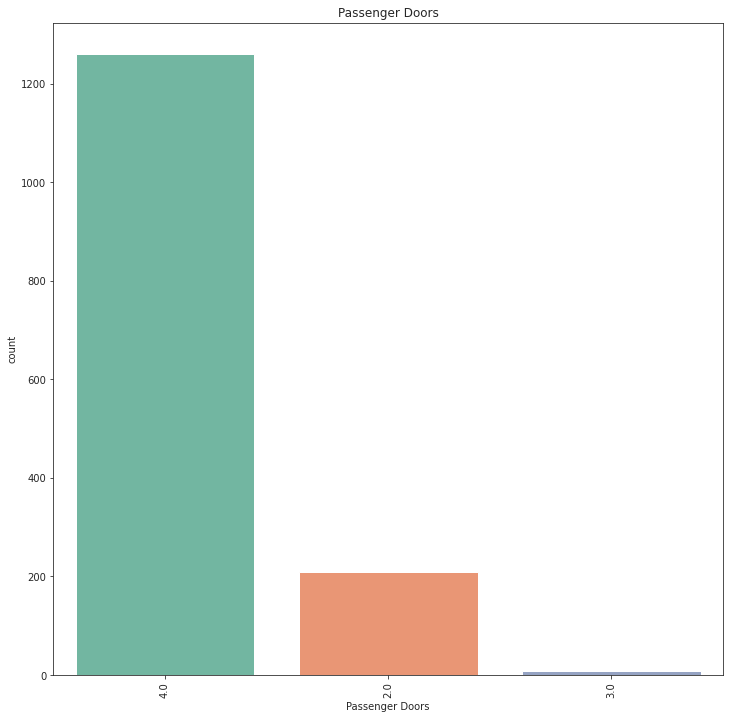

In [0]:
column = "Passenger Doors"
plt.figure(figsize=(12, 12))
sns.countplot(column, data=cars_info, order=cars_info[column].value_counts().index)
plt.title(column)
plt.xticks(rotation=90)
plt.show()

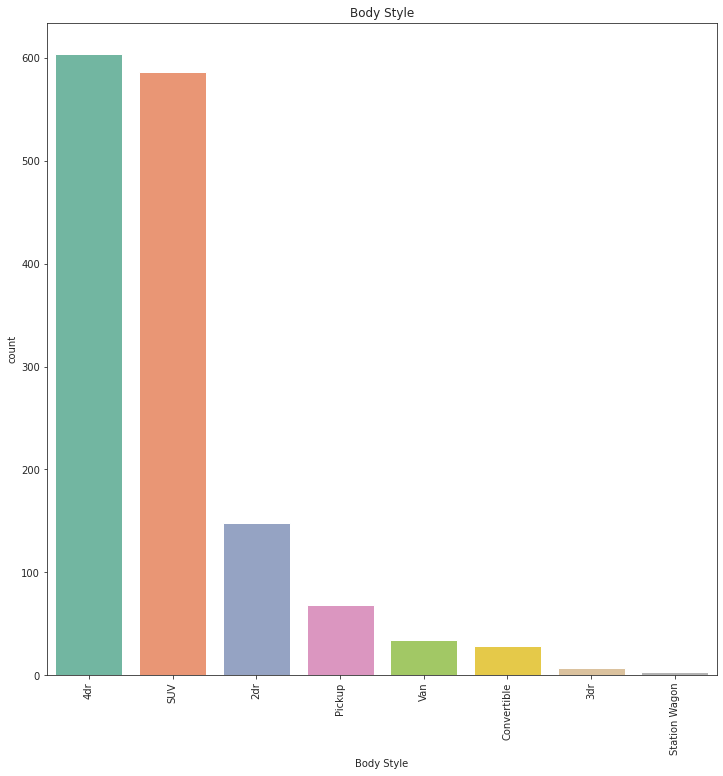

In [0]:
column = "Body Style"
plt.figure(figsize=(12, 12))
sns.countplot(column, data=cars_info, order=cars_info[column].value_counts().index)
plt.title(column)
plt.xticks(rotation=90)
plt.show()

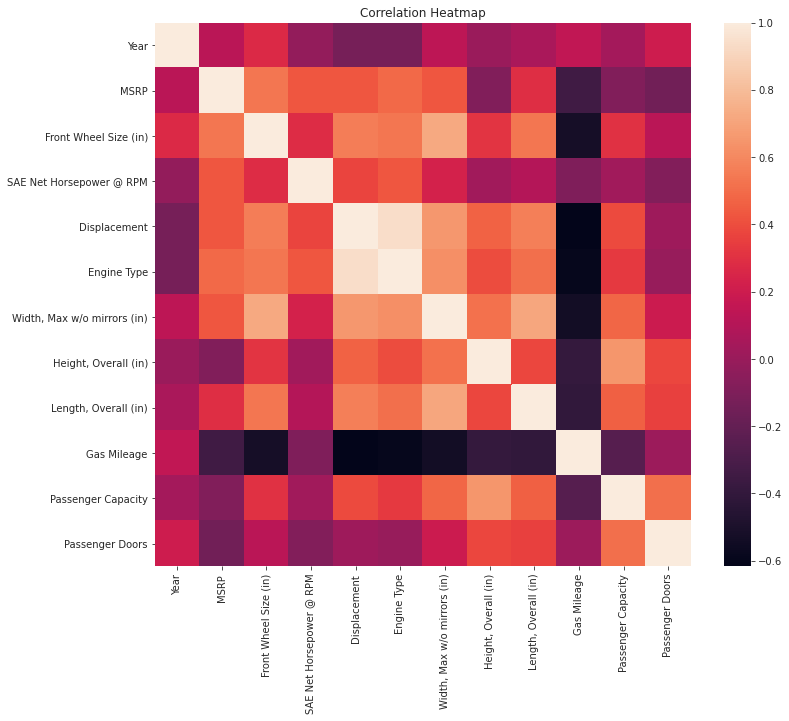

In [0]:
plt.figure(figsize=(12,10))
sns.heatmap(cars_info.corr())
plt.title("Correlation Heatmap")
plt.show()

One-hot encode categorical data

In [0]:
cars_info = pd.get_dummies(cars_info, drop_first=True)

Split data into training and testing sets

In [0]:
y = cars_info.pop("MSRP")
x = cars_info

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Normalize features

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Decision Tree Regression

In [0]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
y_pred = dt.predict(x_train)
print(f"MSE: {mse(y_train, y_pred)}")

MSE: 0.0


In [0]:
y_pred = dt.predict(x_test)
print(f"MSE: {mse(y_test, y_pred)}")

MSE: 54638513.51351351


Random Forest Regression

In [0]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = rf.predict(x_train)
print(f"MSE: {mse(y_train, y_pred)}")

MSE: 4450361.844331642


In [0]:
y_pred = rf.predict(x_test)
print(f"MSE: {mse(y_test, y_pred)}")

MSE: 29355760.81081081


XGBOOST Regression

In [0]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[02:10:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = xgb.predict(x_train)
print(f"MSE: {mse(y_train, y_pred)}")

MSE: 27318632.595034108


In [0]:
y_pred = xgb.predict(x_test)
print(f"MSE: {mse(y_test, y_pred)}")

MSE: 56135984.862950444


Hyperparameter Tuning

In [0]:
parameters = {
    "bootstrap": [True, False],
    "max_depth": [75, 100, 125, 150],
    "max_features": [2, 3, 5, 10],
    "min_samples_leaf": [1, 2, 5, 7],
    "min_samples_split": [2, 5, 10, 15],
    "n_estimators": [100, 200, 300, 500]
}

In [0]:
model = GridSearchCV(RandomForestRegressor(), param_grid = parameters, verbose=1, n_jobs=-1)
model.fit(x_train, y_train)

Fitting 5 folds for each of 2048 candidates, totalling 10240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 57.3min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 66.2min
[Parallel(n_jobs=-1)]: Done 10240 out of 10240

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [0]:
model.best_params_

{'bootstrap': False,
 'max_depth': 150,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [0]:
y_pred = model.predict(x_test)
print(f"MSE: {mse(y_test, y_pred)}")

MSE: 14948554.354354355


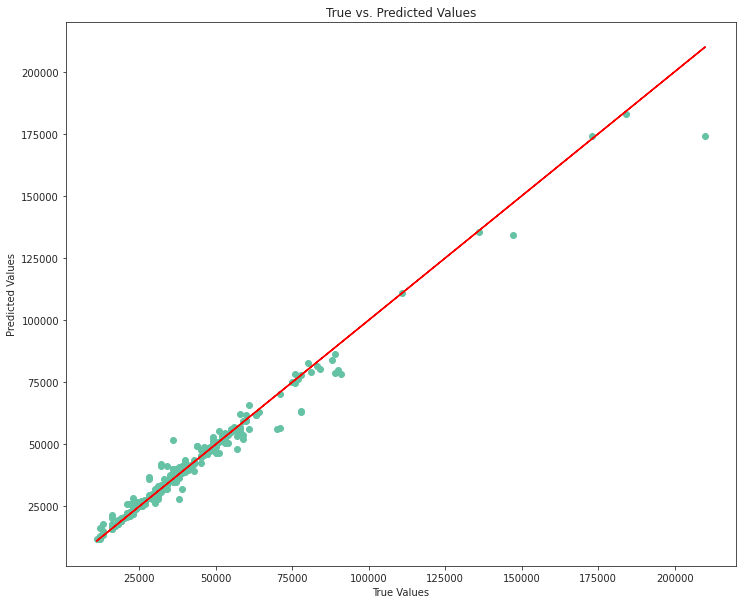

MSE: 14948554.354354355
RMSE: 3866.336037433161


In [0]:
plt.figure(figsize=(12,10))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()

print(f"MSE: {mse(y_test, y_pred)}")
print(f"RMSE: {sqrt(mse(y_test, y_pred))}")